In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from adjustText import adjust_text
import omniplot.plot as op

<H4> This dataset shows the obesity rate by each country between male and female

In [4]:
df = pd.read_csv('D:/Data/obeseNations.csv', sep = ',')

In [5]:
df

,code,Country,value,Female,Male
0,AFG,Afghanistan,2.9,4.1,1.8
1,AGO,Angola,10.2,14.2,6.0
2,ALB,Albania,17.6,18.7,16.5
3,AND,Andorra,29.5,30.5,28.5
4,ARE,United Arab Emirates,37.2,45.1,33.8
...,...,...,...,...,...
174,WSM,Samoa,43.4,51.3,36.0
175,YEM,Yemen,17.2,23.4,11.1
176,ZAF,South Africa,26.8,37.3,15.7
177,ZMB,Zambia,8.9,14.3,3.4


# DATA CLEANSING

In [9]:
df.sample()

,code,Country,value,Female,Male
4,ARE,United Arab Emirates,37.2,45.1,33.8


In [11]:
df.dtypes

code        object
Country     object
value      float64
 Female    float64
 Male      float64
dtype: object

In [13]:
df.shape

(179, 5)

In [15]:
df.count()

code       179
Country    179
value      179
 Female    179
 Male      179
dtype: int64

In [17]:
df.nunique()

code       179
Country    179
value      145
 Female    146
 Male      132
dtype: int64

In [19]:
df[df == 0].sum()

code         0
Country      0
value      0.0
 Female    0.0
 Male      0.0
dtype: object

In [21]:
df[df.duplicated].sum()

code       0.0
Country    0.0
value      0.0
 Female    0.0
 Male      0.0
dtype: float64

In [23]:
df.isna().sum()

code       0
Country    0
value      0
 Female    0
 Male      0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   code     179 non-null    object 
 1   Country  179 non-null    object 
 2   value    179 non-null    float64
 3    Female  179 non-null    float64
 4    Male    179 non-null    float64
dtypes: float64(3), object(2)
memory usage: 7.1+ KB


In [27]:
df.describe()

,value,Female,Male
count,179.000000,179.000000,179.000000
mean,19.781006,23.553073,16.096089
std,10.880602,12.099101,10.523961
min,2.200000,3.200000,0.700000
25%,9.750000,14.400000,5.650000
50%,20.500000,23.200000,17.200000
75%,26.300000,30.850000,22.800000
max,50.800000,55.100000,46.600000


<H1> Exploratory Data Analysis


<H4> Below are the questions that i am going to cover based on the data given.


<H4> 1 what is the obesity rate for males in the first 90 countries? the plot must be in a descending order.

<H4> 2 what is the obesity rate for females in the first 90 countries? the plot must be in a descending order.

<H4> 3 what are the top ten Countries with the  highest obesity rate for males?

<H4> 4 what are the top ten Countries with the  highest obesity rate for females?

<H4> 5 what are the top ten Countries with the highest value in obesity?




<H3> The obesity rate for Males in each Country

In [31]:
df.columns = df.columns.str.strip()

In [33]:
df['Male'].min()

0.7

In [35]:
df['Male'].max()

46.6

In [37]:
df_rate = df.groupby('Country')['Male'].sum().reset_index()

In [39]:
df_rate

,Country,Male
0,Afghanistan,1.8
1,Albania,16.5
2,Algeria,18.8
3,Andorra,28.5
4,Angola,6.0
...,...,...
174,Uzbekistan,12.1
175,Vanuatu,29.4
176,Yemen,11.1
177,Zambia,3.4


In [41]:
df1 = df_rate.sort_values('Male', ascending = False)

In [43]:
df1

,Country,Male
38,Cook Islands,46.6
122,Palau,43.1
130,Qatar,40.0
111,Nauru,39.7
118,Niue,37.7
...,...,...
52,Eritrea,1.4
109,Myanmar,1.4
161,Timor-Leste,1.2
133,Rwanda,1.2


In [45]:
df1 = df1[:90]

C:\Users\FarranceMM\AppData\Local\Temp\ipykernel_6788\1833994426.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  line.set_yticklabels(['{:,.0f}%'.format(y) for y in line.get_yticks()])
C:\Users\FarranceMM\AppData\Local\Temp\ipykernel_6788\1833994426.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  line.set_xticklabels(line.get_xticklabels(), rotation = 90, ha = 'center')


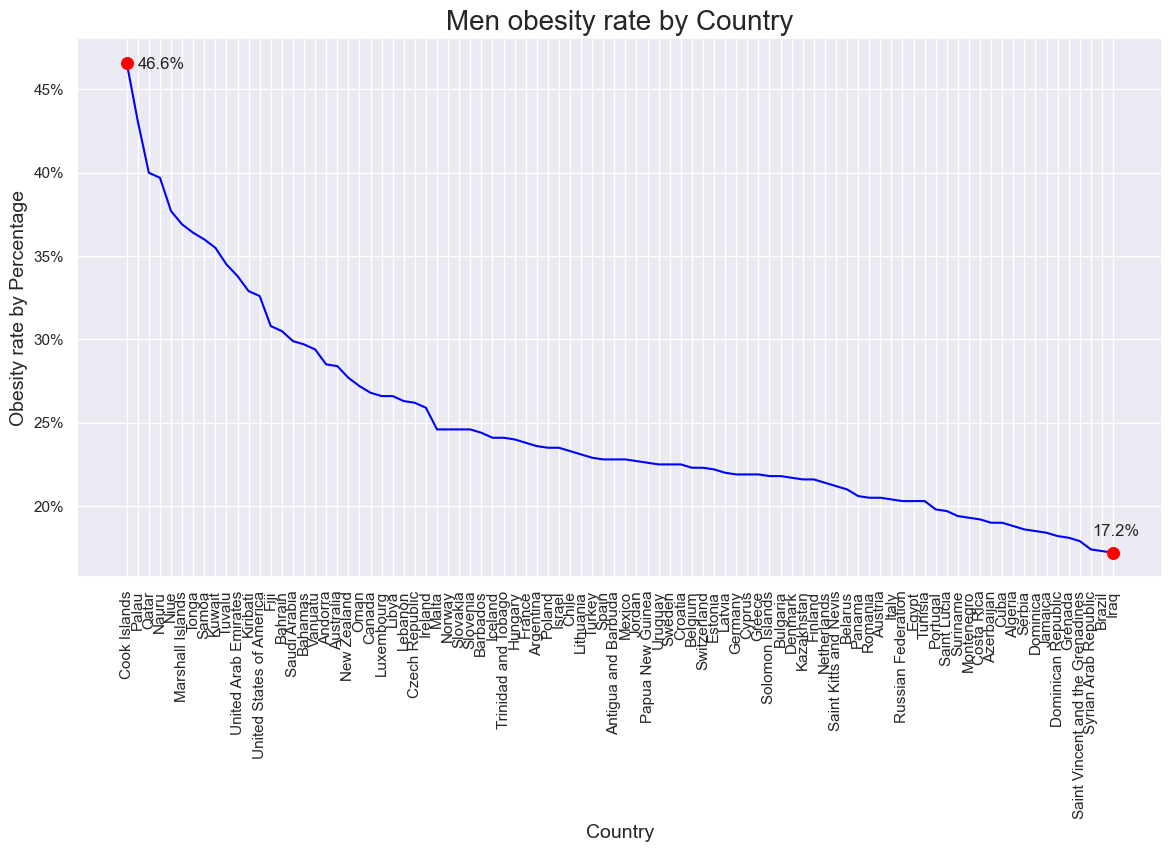

In [47]:
plt.figure(figsize = (14, 7))
line = sns.lineplot(x = 'Country', y = 'Male', data = df1, errorbar = None, color = 'blue')
max_value = round(df1['Male'].max(), 1)
min_value = round(df1['Male'].min(), 1)
plt.scatter(df1['Country'][df1['Male'].idxmax()], max_value, s = 70, zorder = 3, color = 'red')
plt.scatter(df1['Country'][df1['Male'].idxmin()], min_value, s = 70, zorder = 3, color = 'red')
plt.annotate(str(max_value) + '%', (df1['Country'][df1['Male'].idxmax()], max_value),
             textcoords = 'offset points', xytext = (25, -4), ha = 'center')
plt.annotate(str(min_value) + '%', (df1['Country'][df1['Male'].idxmin()], min_value),
             textcoords = 'offset points', xytext = (2, 12), ha = 'center')
line.set_yticklabels(['{:,.0f}%'.format(y) for y in line.get_yticks()])
line.set_xticklabels(line.get_xticklabels(), rotation = 90, ha = 'center')
plt.title('Men obesity rate by Country', fontsize =20)
plt.xlabel('Country', fontsize = 14)
plt.ylabel('Obesity rate by Percentage', fontsize = 14)
plt.show()

<H4> This graph is about the male obesity rate in each country, which shows that the Cook Islands has the highest number of males who are obese and the 
Iraq has the lowest number males who are obese

<H4> Male obesity rates may differ by each country because of cultural attitudes torwards body image and also good access to healthcare can play a vital role in decreasing the rate at which the male obesity is growing

<H3> The obesity rate for Females in each Country

In [51]:
df['Female'].min()

3.2

In [53]:
df['Female'].max()

55.1

In [55]:
df_rate = df.groupby('Country')['Female'].sum().reset_index()

In [57]:
df_rate

,Country,Female
0,Afghanistan,4.1
1,Albania,18.7
2,Algeria,30.8
3,Andorra,30.5
4,Angola,14.2
...,...,...
174,Uzbekistan,18.9
175,Vanuatu,41.5
176,Yemen,23.4
177,Zambia,14.3


In [59]:
dfs = df_rate.sort_values('Female', ascending = False)

In [61]:
dfs

,Country,Female
38,Cook Islands,55.1
122,Palau,52.2
111,Nauru,51.6
137,Samoa,51.3
163,Tonga,50.1
...,...,...
26,Burundi,4.5
109,Myanmar,4.3
0,Afghanistan,4.1
161,Timor-Leste,3.2


In [63]:
dfs = dfs[:90]

C:\Users\FarranceMM\AppData\Local\Temp\ipykernel_6788\3623303447.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  line.set_yticklabels(['{:,.0f}%'.format(y) for y in line.get_yticks()])
C:\Users\FarranceMM\AppData\Local\Temp\ipykernel_6788\3623303447.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  line.set_xticklabels(line.get_xticklabels(), rotation = 90, ha = 'center')


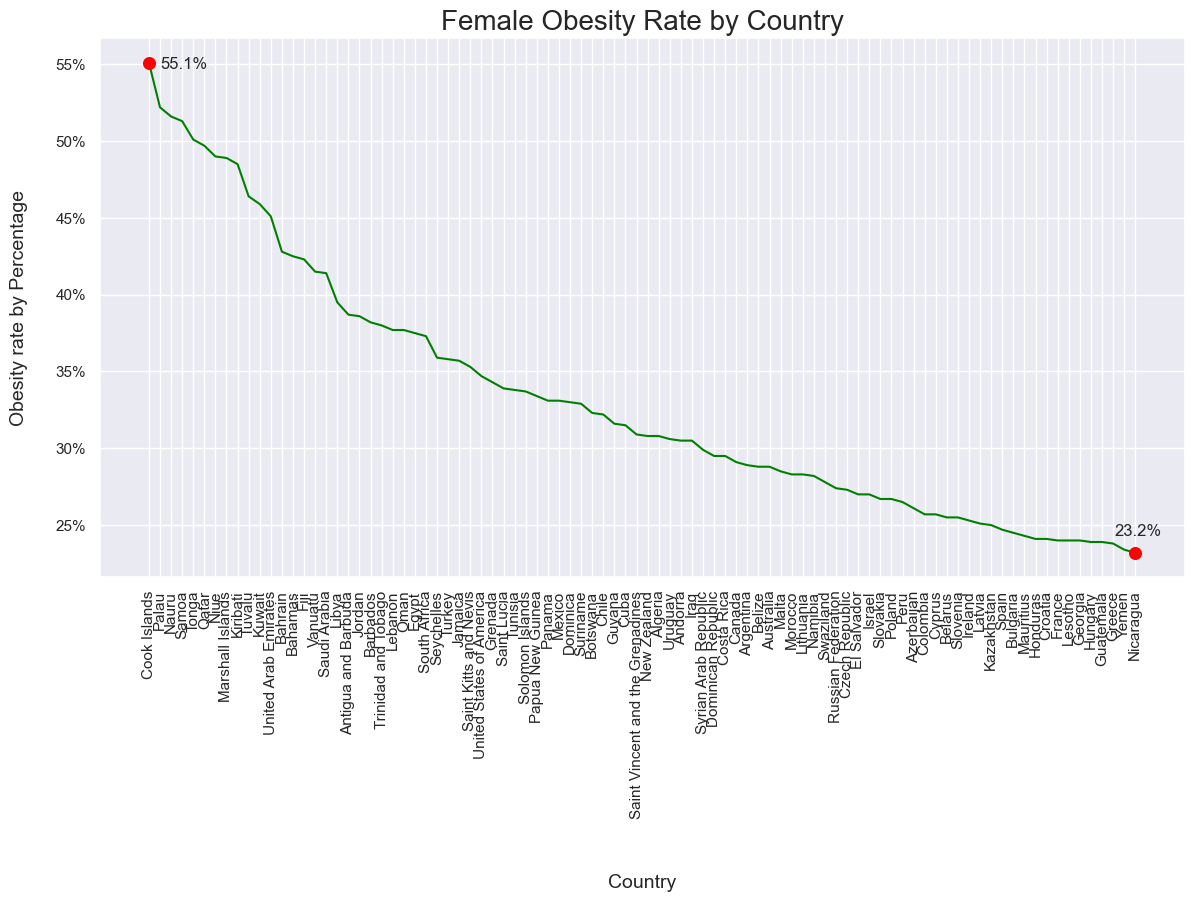

In [65]:
plt.figure(figsize = (14, 7))
line = sns.lineplot(x = 'Country', y = 'Female', data = dfs, errorbar = None, color = 'green')
max_value = round(dfs['Female'].max(), 1)
min_value = round(dfs['Female'].min(), 1)
plt.scatter(dfs['Country'][dfs['Female'].idxmax()], max_value, s = 70, color = 'red', zorder = 3)
plt.scatter(dfs['Country'][dfs['Female'].idxmin()], min_value, s = 70, color = 'red', zorder = 3)
plt.annotate(str(max_value) + '%', (dfs['Country'][dfs['Female'].idxmax()], max_value), 
             textcoords = 'offset points', xytext = (25, -4), ha = 'center')
plt.annotate(str(min_value) + '%', (dfs['Country'][dfs['Female'].idxmin()], min_value),
             textcoords = 'offset points', xytext = (2, 12), ha = 'center')
line.set_yticklabels(['{:,.0f}%'.format(y) for y in line.get_yticks()])
line.set_xticklabels(line.get_xticklabels(), rotation = 90, ha = 'center')
plt.title('Female Obesity Rate by Country', fontsize = 20)
plt.ylabel('Obesity rate by Percentage', fontsize = 14, labelpad = 20)
plt.xlabel('Country', fontsize = 14, labelpad = 40)
plt.show()

<H4> This graph is about the female obesity rate in each country, which shows that the Cook Islands has the highest number ofmales who
are obese and the Nicarangua has the lowest number males who are obese 

<H4> when i draw my conclusion in comparison to both the males and the females graph i found out Cook Islands has the highest obesity rates for both 
males and females, females obesity rates is higher than males obesity rate it can be various factors that contribute to the growing number of female 
obesity such lack of physical activaties, societal pressures, access to health care and dietary habits.

<H3> The top ten Countries with the highest Male obesity rate

In [69]:
dftt = pd.DataFrame(df.groupby('Country')['Male'].sum())

In [71]:
dftt

,Male
Country,
Afghanistan,1.8
Albania,16.5
Algeria,18.8
Andorra,28.5
Angola,6.0
...,...
Uzbekistan,12.1
Vanuatu,29.4
Yemen,11.1


In [73]:
dftt2 = dftt.sort_values('Male', ascending = False)

In [75]:
dftt2

,Male
Country,
Cook Islands,46.6
Palau,43.1
Qatar,40.0
Nauru,39.7
Niue,37.7
...,...
Eritrea,1.4
Myanmar,1.4
Timor-Leste,1.2


In [76]:
dftt2[:10]

,Male
Country,
Cook Islands,46.6
Palau,43.1
Qatar,40.0
Nauru,39.7
Niue,37.7
Marshall Islands,36.9
Tonga,36.4
Samoa,36.0
Kuwait,35.5


<H3> The top ten Countries with the highest Female obesity rate

In [80]:
dftt = pd.DataFrame(df.groupby('Country')['Female'].sum())

In [81]:
dftt

,Female
Country,
Afghanistan,4.1
Albania,18.7
Algeria,30.8
Andorra,30.5
Angola,14.2
...,...
Uzbekistan,18.9
Vanuatu,41.5
Yemen,23.4


In [84]:
dftt2 = dftt.sort_values('Female', ascending = False)

In [86]:
dftt2

,Female
Country,
Cook Islands,55.1
Palau,52.2
Nauru,51.6
Samoa,51.3
Tonga,50.1
...,...
Burundi,4.5
Myanmar,4.3
Afghanistan,4.1


In [87]:
dftt2[:10]

,Female
Country,
Cook Islands,55.1
Palau,52.2
Nauru,51.6
Samoa,51.3
Tonga,50.1
Qatar,49.7
Niue,49.0
Marshall Islands,48.9
Kiribati,48.5


<H3> Top ten Countries with the highest obesity value 

In [91]:
dftt = pd.DataFrame(df.groupby('Country')['value'].sum())

In [93]:
dftt

,value
Country,
Afghanistan,2.9
Albania,17.6
Algeria,24.8
Andorra,29.5
Angola,10.2
...,...
Uzbekistan,15.5
Vanuatu,35.4
Yemen,17.2


In [95]:
dftt2 = dftt.sort_values('value', ascending = False)

In [97]:
dftt2

,value
Country,
Cook Islands,50.8
Palau,47.6
Nauru,45.6
Samoa,43.4
Tonga,43.3
...,...
Cambodia,3.2
Myanmar,2.9
Afghanistan,2.9


In [99]:
dftt2[:10]

,value
Country,
Cook Islands,50.8
Palau,47.6
Nauru,45.6
Samoa,43.4
Tonga,43.3
Niue,43.2
Marshall Islands,42.8
Qatar,42.3
Kiribati,40.6
